In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_csv("C:/Users/dheer/Desktop/Deep_Learning_A_Z/international-airline-passengers.csv")

In [4]:
dataset.head()


,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
dataset['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].fillna(0,inplace=True)
t1=dataset.iloc[:,1:2].values

In [6]:

from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range =(0,1))
scaled_train=sc.fit_transform(t1)

In [7]:
x_train=[]
y_train=[]
for i in range(1,100):
    x_train.append(scaled_train[i-1:i,0])
    y_train.append(scaled_train[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
y_train.shape

(99,)

In [8]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [9]:
x_train.shape

(99, 1, 1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.
C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
    

In [25]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
    

In [26]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [27]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))
    

In [28]:
regressor.add(Dense(units=1))

In [29]:
regressor.compile(optimizer='adam',loss ='mean_squared_error')

In [30]:
regressor.fit(x_train,y_train,epochs=100,batch_size=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
99/99 [==============================] - 4s - loss: 0.0750     
Epoch 2/100
99/99 [==============================] - 0s - loss: 0.0135     
Epoch 3/100
99/99 [==============================] - 0s - loss: 0.0137     
Epoch 4/100
99/99 [==============================] - 0s - loss: 0.0132     
Epoch 5/100
99/99 [==============================] - 0s - loss: 0.0112     
Epoch 6/100
99/99 [==============================] - 0s - loss: 0.0083     
Epoch 7/100
99/99 [==============================] - 0s - loss: 0.0059     
Epoch 8/100
99/99 [==============================] - 0s - loss: 0.0055     
Epoch 9/100
99/99 [==============================] - 0s - loss: 0.0081     
Epoch 10/100
99/99 [==============================] - 0s - loss: 0.0042     
Epoch 11/100
99/99 [==============================] - 0s - loss: 0.0049     
Epoch 12/100
99/99 [==============================] - 0s - loss: 0.0035     
Epoch 13/100
99/99 [=================

In [58]:
t2=dataset.iloc[100: ,1:2].values
#t2=t2.reshape(-1,1)
test_scaled=sc.fit_transform(t2)
print(len(test_scaled))

x_test=[]
y_test=[]
for i in range(1,len(t2)):
    x_test.append(test_scaled[i-1:i,0])
    y_test.append(test_scaled[i,0])
x_test.append(test_scaled[44])
x_test=np.array(x_test)





45


In [59]:
#type(x_test)
x_test.shape

(45, 1)

In [60]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(45, 1, 1)

In [61]:
model=regressor.predict(x_test)
model.shape
#model[0]
model=sc.inverse_transform(model)
t2


array([[355.],
       [422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.],
       [432.],
       [  0.]])

In [62]:
len(model)

45

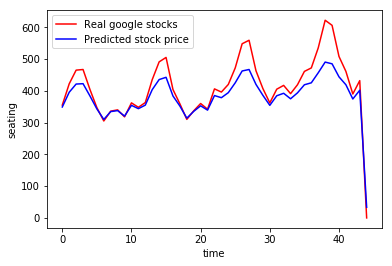

In [63]:
plt.plot(t2,color='red',label='Real google stocks')
plt.plot(model,color='blue',label='Predicted stock price')
plt.xlabel('time')
plt.ylabel('seating')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'append'